In [57]:
# Import necessary libraries
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download CIFAR-10 dataset without any transformations
train_dataset = datasets.CIFAR10(root='data', train=True, download=True)
test_dataset = datasets.CIFAR10(root='data', train=False, download=True)


Files already downloaded and verified
Files already downloaded and verified


In [58]:
train_dataset, test_dataset

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data
     Split: Train,
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: data
     Split: Test)

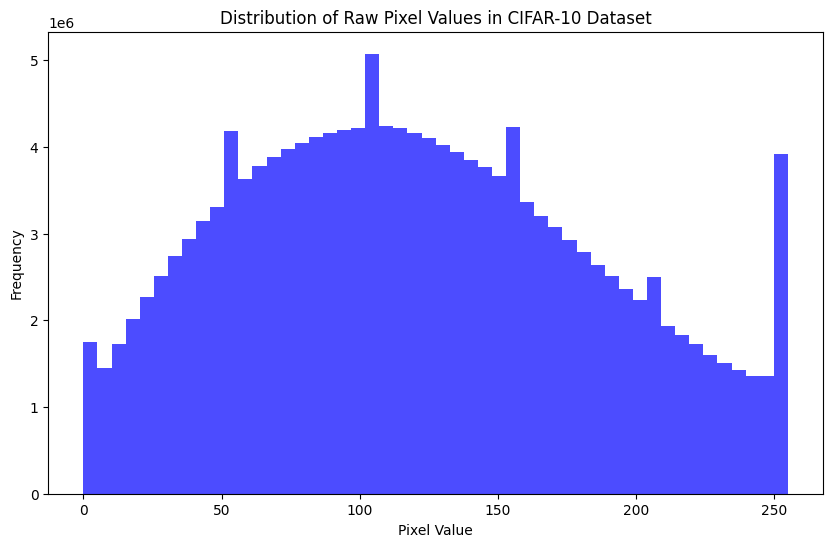

In [59]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Extract raw pixel values
all_pixels = np.concatenate([np.array(img).flatten() for img, label in train_dataset])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(all_pixels, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Raw Pixel Values in CIFAR-10 Dataset')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [60]:
np.max(all_pixels), np.min(all_pixels)

(np.uint8(255), np.uint8(0))

In [61]:
# Download as tensor

# Import necessary libraries
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=ToTensor())
test_dataset = datasets.CIFAR10(root='data', train=False, download=True, transform=ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [62]:
train_dataset, test_dataset


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

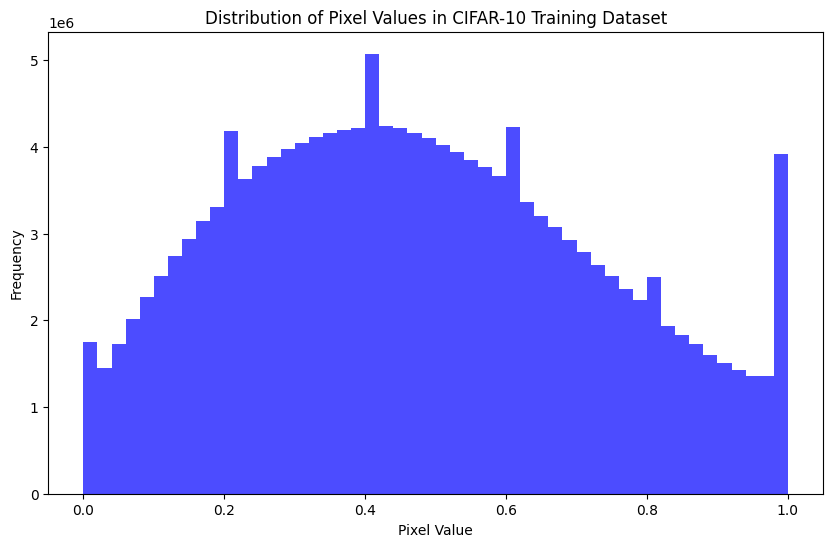

In [63]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Extract and flatten pixel values from the training dataset
all_pixels = torch.cat([img.view(-1) for img, label in train_dataset])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(all_pixels.numpy(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Pixel Values in CIFAR-10 Training Dataset')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [64]:
# # Extract X_train, X_test
# X_train = torch.stack([img for img, label in train_dataset])
# X_test = torch.stack([img for img, label in test_dataset])

# # Extract y_train, y_test as one hot encoded
# y_train = torch.tensor([label for img, label in train_dataset])
# y_test = torch.tensor([label for img, label in test_dataset])

# # Print the shape of X_train, X_test, y_train, y_test
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [65]:
# # plot the distribution of y_train
# plt.figure(figsize=(10, 6))
# plt.hist(y_train.numpy(), bins=10, color='blue', alpha=0.7) # 10 classes
# plt.title('Distribution of Labels in CIFAR-10 Training Dataset')
# plt.xlabel('Label')
# plt.ylabel('Frequency')
# plt.show()

# print the unique values in y_train
# torch.unique(y_train)

In [66]:
# # convert y_train, y_test to one hot encoded
# y_train = torch.nn.functional.one_hot(y_train, num_classes=10)
# y_test = torch.nn.functional.one_hot(y_test, num_classes=10)

# # print the shape of y_train, y_test
# y_train.shape, y_test.shape

In [67]:
# X_train[54, 1, 12, 13]

In [35]:
# from torch import nn

# model = nn.Sequential(
#     nn.Flatten(),
#     nn.Linear(in_features=3*32*32, out_features=200),
#     nn.ReLU(),
#     nn.Linear(in_features=200, out_features=150),
#     nn.ReLU(),
#     nn.Linear(in_features=150, out_features=10),
#     nn.Softmax(dim=1)
# )

In [68]:
from torch import nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(in_features=3*32*32, out_features=200)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(200,150)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(150,10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu2(x)
        x = self.linear3(x)
        x = self.softmax(x)
        return x
    
torch.manual_seed(42)
model = Model()
model

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=3072, out_features=200, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=200, out_features=150, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=150, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [69]:
# print the shape of the parameters
for param in model.parameters():
    print(param.shape)

torch.Size([200, 3072])
torch.Size([200])
torch.Size([150, 200])
torch.Size([150])
torch.Size([10, 150])
torch.Size([10])


In [70]:
from torchsummary import summary
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [-1, 3072]               0
            Linear-2                  [-1, 200]         614,600
              ReLU-3                  [-1, 200]               0
            Linear-4                  [-1, 150]          30,150
              ReLU-5                  [-1, 150]               0
            Linear-6                   [-1, 10]           1,510
           Softmax-7                   [-1, 10]               0
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.03
Params size (MB): 2.47
Estimated Total Size (MB): 2.51
----------------------------------------------------------------


In [71]:
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimitzer = torch.optim.Adam(model.parameters(), lr=0.0005)

### without the one hot encoding

In [72]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=ToTensor())
test_dataset = datasets.CIFAR10(root='data', train=False, download=True, transform=ToTensor())

train_dataset, test_dataset

Files already downloaded and verified
Files already downloaded and verified


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [73]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)    

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x2974b3d10>,
 <torch.utils.data.dataloader.DataLoader at 0x2974f8bf0>)

In [74]:
model

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=3072, out_features=200, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=200, out_features=150, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=150, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [75]:
def accuracy_fn(y_pred, y_true):
    correct_pred = torch.eq(torch.argmax(y_pred, 1), y_true)   
    accuracy = correct_pred.sum().item() / len(y_true)
    return accuracy

In [76]:
def train_step(model, train_loader, loss_fn, accuracy_fn, optimizer):
    model.train()
    train_loss = 0.0
    train_acc = 0.0
    for X, y in train_loader:
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += accuracy_fn(y_pred, y)
    return train_loss/len(train_loader), train_acc/len(train_loader)

def test_step(model, test_loader, loss_fn, accuracy):
    test_loss = 0.0
    test_acc = 0.0
    model.eval()
    with torch.inference_mode():
        for X, y in test_loader:
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            test_acc += accuracy_fn(y_pred, y)
    return test_loss/len(test_loader), test_acc/len(test_loader)


In [77]:
# epochs = 10
# for epoch in range(epochs):
#     train_loss, train_acc = train_step(model, train_loader, loss_fn, accuracy_fn, optimitzer)
#     test_loss, test_acc = test_step(model, test_loader, loss_fn, accuracy_fn)
#     print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

Epoch 1/10, Train Loss: 2.1550, Train Acc: 0.2957, Test Loss: 2.1049, Test Acc: 0.3497
Epoch 2/10, Train Loss: 2.0996, Train Acc: 0.3533, Test Loss: 2.0723, Test Acc: 0.3833
Epoch 3/10, Train Loss: 2.0803, Train Acc: 0.3744, Test Loss: 2.0725, Test Acc: 0.3799
Epoch 4/10, Train Loss: 2.0650, Train Acc: 0.3892, Test Loss: 2.0649, Test Acc: 0.3913
Epoch 5/10, Train Loss: 2.0561, Train Acc: 0.3998, Test Loss: 2.0511, Test Acc: 0.4004
Epoch 6/10, Train Loss: 2.0454, Train Acc: 0.4099, Test Loss: 2.0415, Test Acc: 0.4131
Epoch 7/10, Train Loss: 2.0355, Train Acc: 0.4207, Test Loss: 2.0287, Test Acc: 0.4283
Epoch 8/10, Train Loss: 2.0274, Train Acc: 0.4289, Test Loss: 2.0227, Test Acc: 0.4341
Epoch 9/10, Train Loss: 2.0184, Train Acc: 0.4378, Test Loss: 2.0201, Test Acc: 0.4338
Epoch 10/10, Train Loss: 2.0151, Train Acc: 0.4405, Test Loss: 2.0262, Test Acc: 0.4282


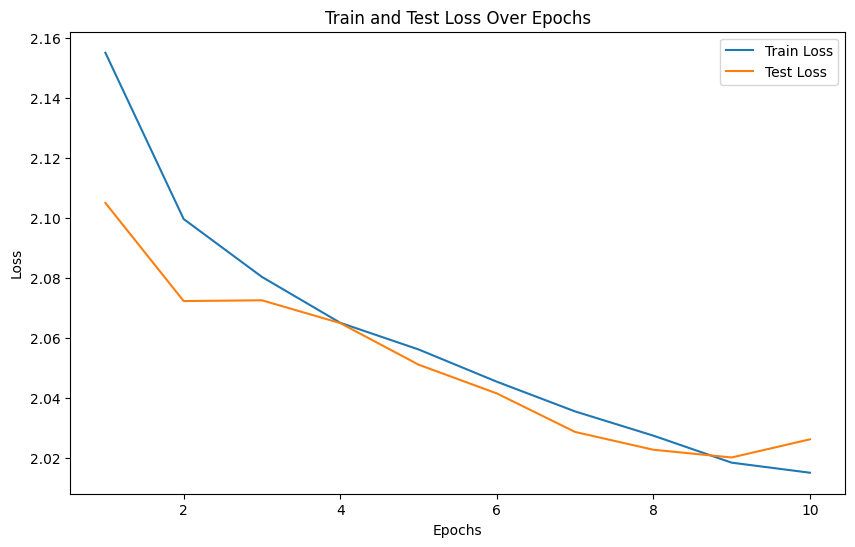

In [78]:
# Initialize lists to store loss values
train_losses = []
test_losses = []

# Training loop
epochs = 10
for epoch in range(epochs):
    train_loss, train_acc = train_step(model, train_loader, loss_fn, accuracy_fn, optimitzer)
    test_loss, test_acc = test_step(model, test_loader, loss_fn, accuracy_fn)
    
    # Store the loss values
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

# Plot the train and test loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')
plt.legend()
plt.show()

In [79]:
import torch

def evaluate_model(model, data_loader, loss_fn, accuracy_fn):
    model.eval()  # Set the model to evaluation mode
    eval_loss = 0.0  # Initialize running loss
    eval_acc = 0.0  # Initialize running accuracy
    num_samples = 0  # Initialize the number of samples

    with torch.inference_mode():  # Disable gradient computation
        for X, y in data_loader:
            y_pred = model(X)  # Forward pass
            loss = loss_fn(y_pred, y)  # Compute the loss
            eval_loss += loss.item() * X.size(0)  # Accumulate the running loss
            eval_acc += accuracy_fn(y_pred, y) * X.size(0)  # Accumulate the running accuracy
            num_samples += X.size(0)  # Accumulate the number of samples

    # Compute the average loss and accuracy for the entire dataset
    avg_loss = eval_loss / num_samples
    avg_acc = eval_acc / num_samples
    
    return avg_loss, avg_acc

In [80]:
# Assuming model, test_loader, loss_fn, and accuracy_fn are already defined
test_loss, test_acc = evaluate_model(model, test_loader, loss_fn, accuracy_fn)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

Test Loss: 2.0259, Test Accuracy: 0.4286


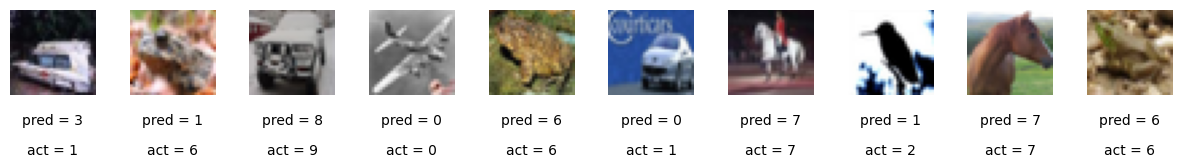

In [81]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import DataLoader

# Assuming test_dataset is a PyTorch Dataset
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

# Load the entire test dataset
x_test, y_test = next(iter(test_loader))

# Convert them to numpy arrays for visualization
x_test_np = x_test.numpy()
y_test_np = y_test.numpy()

# Number of images to show
n_to_show = 10

# Randomly select indices
indices = np.random.choice(range(len(x_test_np)), n_to_show, replace=False)

# Create a figure
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Set the model to evaluation mode
model.eval()

# Disable gradient computation
with torch.no_grad():
    # Get predictions for the selected indices
    x_test_selected = x_test[indices]
    preds = model(x_test_selected)
    preds_single = torch.argmax(preds, dim=1).numpy()
    actual_single = y_test[indices].numpy()

# Plot the images with predictions and actual labels
for i, idx in enumerate(indices):
    img = x_test_np[idx].transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[i]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[i]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.show()

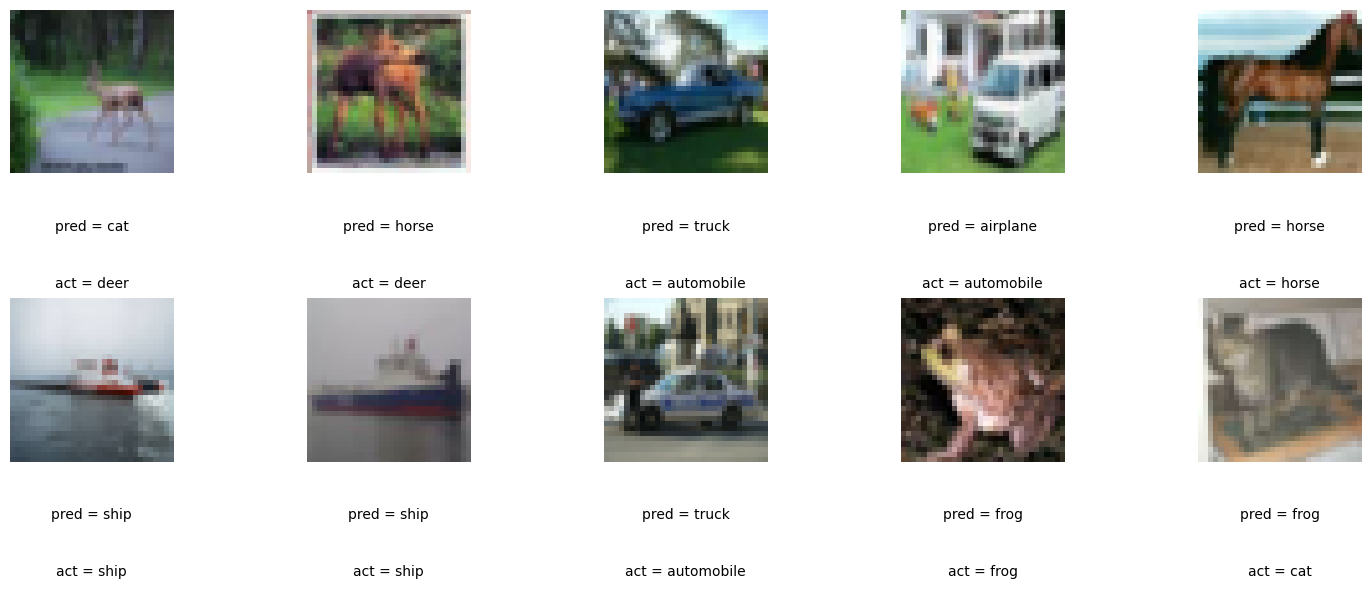

In [84]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Assuming x_test and y_test are PyTorch tensors
# Convert them to numpy arrays for visualization
x_test_np = x_test.numpy()
y_test_np = y_test.numpy()

# Number of images to show
n_to_show = 10

# Randomly select indices
indices = np.random.choice(range(len(x_test_np)), n_to_show, replace=False)

# Create a figure
fig = plt.figure(figsize=(15, 6))  # Adjusted height for 2 rows
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Set the model to evaluation mode
model.eval()

# Disable gradient computation
with torch.no_grad():
    # Get predictions for the selected indices
    x_test_selected = x_test[indices]
    preds = model(x_test_selected)
    preds_single = torch.argmax(preds, dim=1).numpy()
    actual_single = y_test[indices].numpy()

# Plot the images with predictions and actual labels
for i, idx in enumerate(indices):
    img = x_test_np[idx].transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    ax = fig.add_subplot(2, n_to_show // 2, i + 1)  # Adjusted for 2 rows
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + class_names[preds_single[i]], fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + class_names[actual_single[i]], fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.tight_layout()
plt.show()

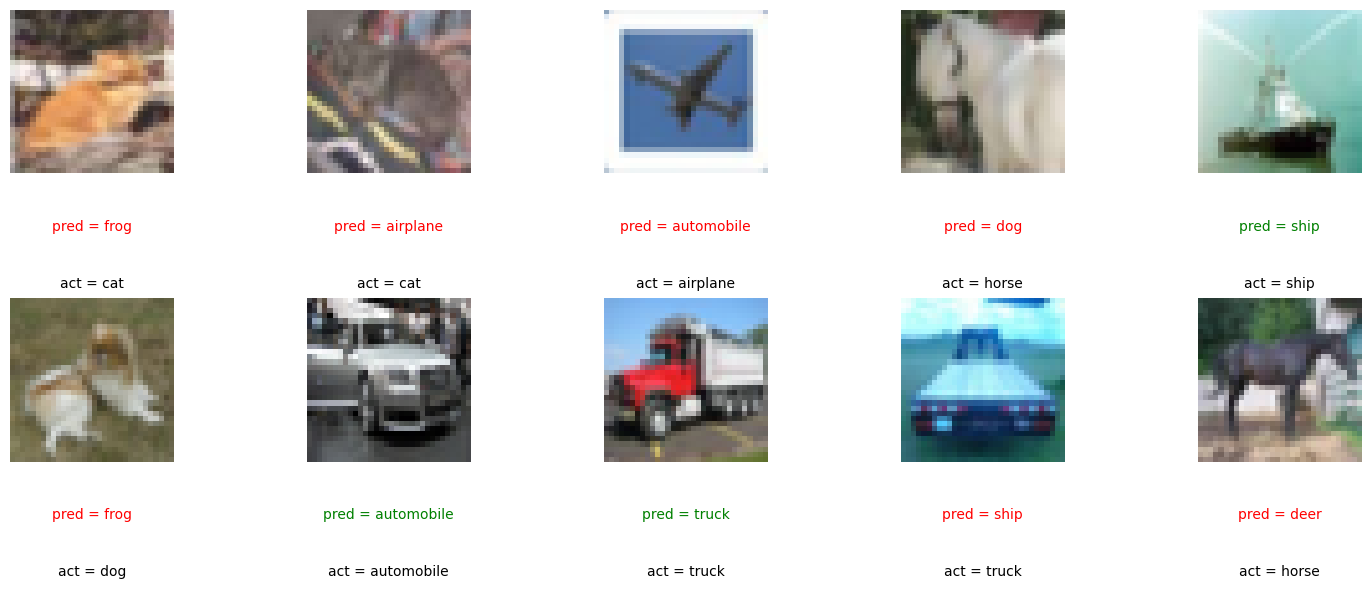

In [85]:
import torch
import numpy as np

import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Assuming x_test and y_test are PyTorch tensors
# Convert them to numpy arrays for visualization
x_test_np = x_test.numpy()
y_test_np = y_test.numpy()

# Number of images to show
n_to_show = 10

# Randomly select indices
indices = np.random.choice(range(len(x_test_np)), n_to_show, replace=False)

# Create a figure
fig = plt.figure(figsize=(15, 6))  # Adjusted height for 2 rows
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Set the model to evaluation mode
model.eval()

# Disable gradient computation
with torch.no_grad():
    # Get predictions for the selected indices
    x_test_selected = x_test[indices]
    preds = model(x_test_selected)
    preds_single = torch.argmax(preds, dim=1).numpy()
    actual_single = y_test[indices].numpy()

# Plot the images with predictions and actual labels
for i, idx in enumerate(indices):
    img = x_test_np[idx].transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    ax = fig.add_subplot(2, n_to_show // 2, i + 1)  # Adjusted for 2 rows
    ax.axis('off')
    pred_label = class_names[preds_single[i]]
    actual_label = class_names[actual_single[i]]
    color = 'green' if preds_single[i] == actual_single[i] else 'red'
    ax.text(0.5, -0.35, f'pred = {pred_label}', fontsize=10, ha='center', transform=ax.transAxes, color=color)
    ax.text(0.5, -0.7, f'act = {actual_label}', fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.tight_layout()
plt.show()

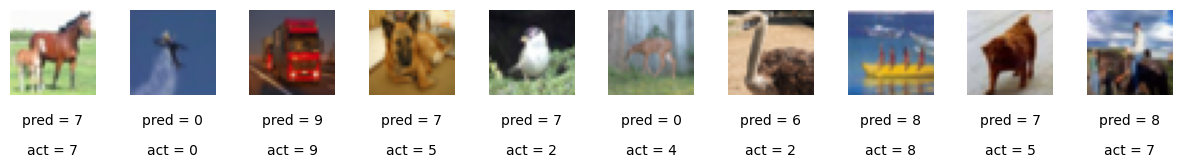

In [82]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import DataLoader

# Assuming test_dataset is a PyTorch Dataset
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

# Load the entire test dataset
x_test, y_test = next(iter(test_loader))

# Convert them to numpy arrays for visualization
x_test_np = x_test.numpy()
y_test_np = y_test.numpy()

# Number of images to show
n_to_show = 10

# Randomly select indices
indices = np.random.choice(range(len(x_test_np)), n_to_show, replace=False)

# Create a figure
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Set the model to evaluation mode
model.eval()

# Disable gradient computation
with torch.no_grad():
    # Get predictions for the selected indices
    x_test_selected = x_test[indices]
    preds = model(x_test_selected)
    preds_single = torch.argmax(preds, dim=1).numpy()
    actual_single = y_test[indices].numpy()

# Plot the images with predictions and actual labels
for i, idx in enumerate(indices):
    img = x_test_np[idx].transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[i]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[i]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Assuming x_test and y_test are PyTorch tensors
# Convert them to numpy arrays for visualization
x_test_np = x_test.numpy()
y_test_np = y_test.numpy()

# Number of images to show
n_to_show = 10

# Randomly select indices
indices = np.random.choice(range(len(x_test_np)), n_to_show, replace=False)

# Create a figure
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Set the model to evaluation mode
model.eval()

# Disable gradient computation
with torch.no_grad():
    # Get predictions for the selected indices
    x_test_selected = x_test[indices]
    preds = model(x_test_selected)
    preds_single = torch.argmax(preds, dim=1).numpy()
    actual_single = y_test[indices].numpy()

# Plot the images with predictions and actual labels
for i, idx in enumerate(indices):
    img = x_test_np[idx].transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[i]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[i]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.show()